In [15]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact
import seaborn as sns


# Set up a seed for reproducibility
np.random.seed(42)
# Autoregressive coefficients
arparams = np.array([.95, .05])
# Moving average coefficients
maparams = np.array([.6, .3])
# Create a ARMA process
arma_process = ArmaProcess.from_coeffs(arparams, maparams)
# Create the control time-series
X = 10 + arma_process.generate_sample(nsample=500)
# Create the response time-series
y = 2 * X + np.random.normal(size=500)
# Add the true causal impact
y[300:] += 10

# Create dates
dates = pd.date_range('2021-01-01', freq='D', periods=500)
# Create dataframe
df = pd.DataFrame({'dates': dates, 'y': y, 'X': X}, columns=['dates', 'y', 'X'])
# Set dates as index
df.set_index('dates', inplace=True)
# Take a look at the data
df.head()



In [ ]:

# Create dates
dates = pd.date_range('2021-10-21', freq='D', periods=500)
# Create dataframe
df = pd.DataFrame({'dates': dates, 'y': y, 'X': X}, columns=['dates', 'y', 'X'])
# Set dates as index
df.set_index('dates', inplace=True)
# Take a look at the data
df.head()


NameError: name 'plt' is not defined

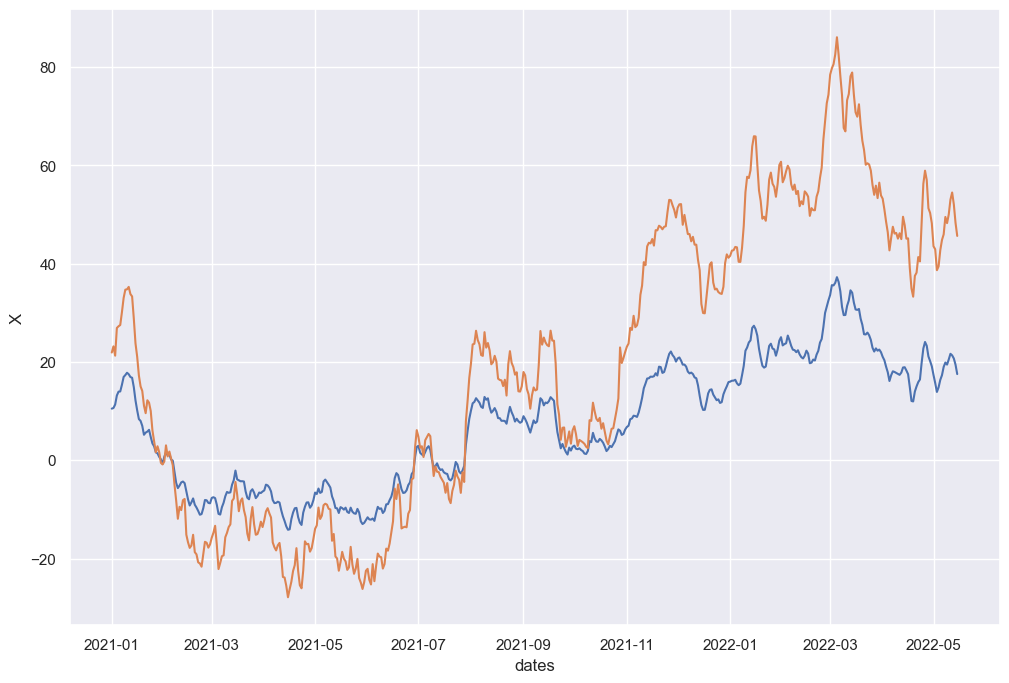

In [2]:
# Visualize data using seaborn
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=df.index, y=df['X'])
sns.lineplot(x=df.index, y=df['y'])
plt.axvline(x= df.index[300], color='red')
plt.legend(labels = ['X', 'y'])

In [7]:
# Set pre-period
pre_period = [str(df.index.min())[:10], str(df.index[299])[:10]]
# Set post-period
post_period = [str(df.index[300])[:10], str(df.index.max())[:10]]

# Print out the values
print(f'The pre-period is {pre_period}')
print(f'The post-period is {post_period}')

The pre-period is ['2021-01-01', '2021-10-27']
The post-period is ['2021-10-28', '2022-05-15']


In [8]:
# Calculate the pre-daily average
pre_daily_avg = df['y'][:300].mean()
# Calculate the post-daily average
post_daily_avg = df['y'][300:].mean()
# Print out the results
print(f'The pre-treatment daily average is {pre_daily_avg}.')
print(f'The post-treatment daily average is {post_daily_avg}.')
print(f'The raw difference between the pre and the post treatment is {post_daily_avg - pre_daily_avg}.')

The pre-treatment daily average is -1.6403416947312546.
The post-treatment daily average is 50.08461262581729.
The raw difference between the pre and the post treatment is 51.72495432054855.


In [9]:
df

,y,X
dates,,
2021-01-01,21.919606,10.496714
2021-01-02,23.172702,10.631643
2021-01-03,21.278713,11.338640
2021-01-04,26.909878,13.173454
2021-01-05,27.260727,13.955685
...,...,...
2022-05-11,53.022972,21.652036
2022-05-12,54.473645,21.337979
2022-05-13,52.046180,20.702669


In [10]:
type(pre_period)

list

c:\moonchang\.venv\lib\site-packages\causalimpact\misc.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_mu = data_mu[0]
c:\moonchang\.venv\lib\site-packages\causalimpact\misc.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_sd = data_sd[0]
c:\moonchang\.venv\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


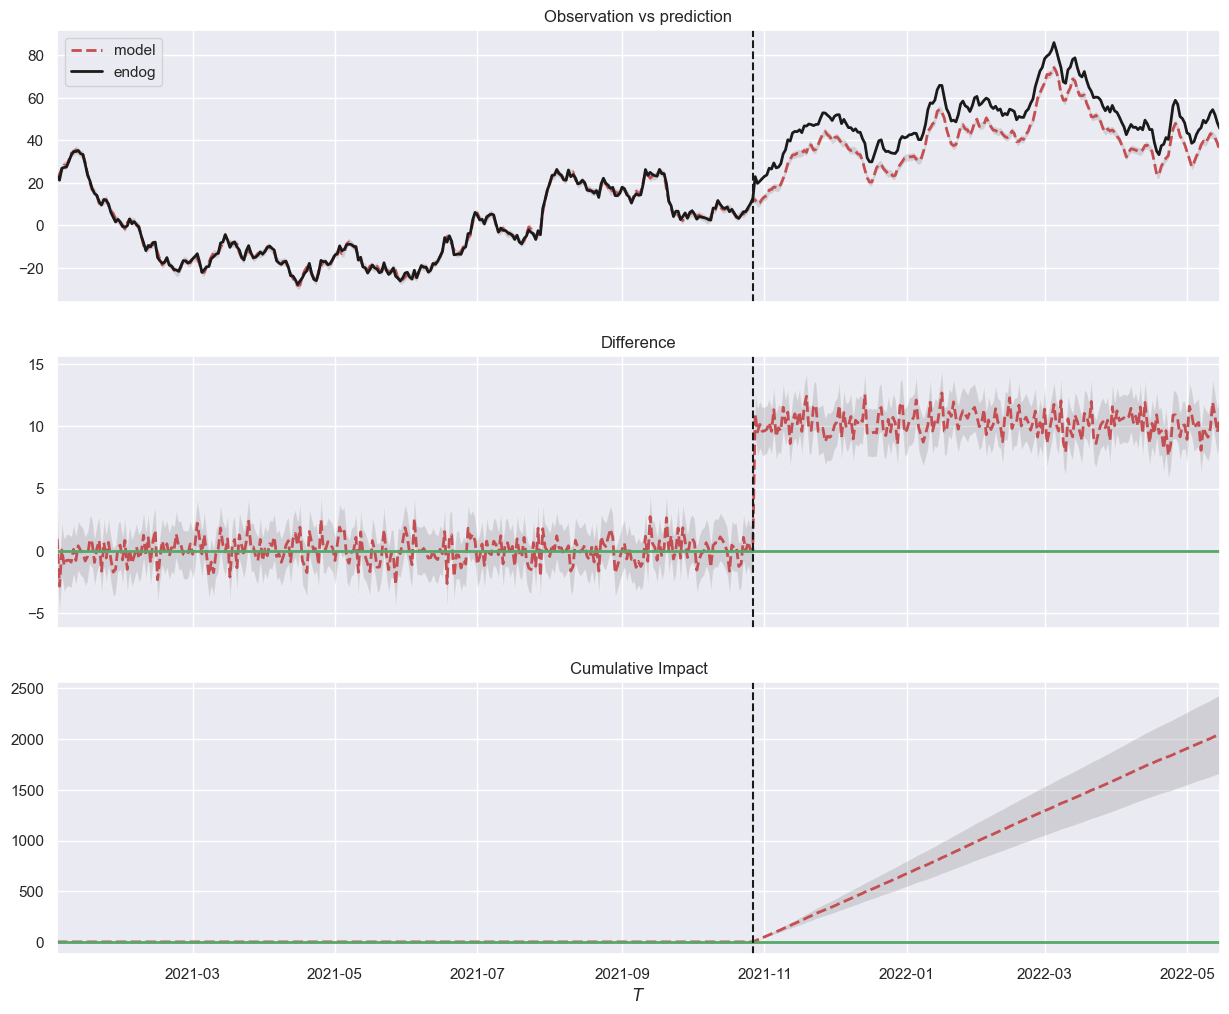

In [12]:
# Causal impact model
impact = CausalImpact(data=df, pre_period=pre_period, post_period=post_period)
impact.run()
# Visualization
impact.plot()

In [13]:
# Causal impact summary
print(impact.summary())


                               Average      Cumulative
Actual                              50           10016
Predicted                           39            7967
95% CI                        [37, 41]    [7579, 8355]
                                                      
Absolute Effect                     10            2049
95% CI                         [12, 8]    [2437, 1661]
                                                      
Relative Effect                  25.7%           25.7%
95% CI                  [30.6%, 20.9%]  [30.6%, 20.9%]
                                                      
P-value                           0.0%                
Prob. of Causal Effect          100.0%                
None


In [14]:

# Causal impact report
print(impact.summary(output='report'))

During the post-intervention period, the response             variable had an average value of             approx. 50.
By contrast, in  the absence of an intervention, we would have expected an average response of 39. The 95% interval of
this counterfactual prediction is [37, 41]. Subtracting this prediction from the observed response yields an estimate of
the causal effect the intervention had on the response variable. This effect is 10 with a 95% interval of [12, 8]. For a
discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 10016.  By contrast, had  the intervention not taken place,
we would have expected a sum of 7967. The 95% interval of this prediction is [7579, 8355]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  an increase
of  25.7%. 